In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import snscrape.modules.twitter as sntwitter
import re
import flair

In [5]:
sentiment_model = flair.models.TextClassifier.load('en-sentiment')

2022-05-02 18:53:03,933 loading file C:\Users\007ra\.flair\models\sentiment-en-mix-distillbert_4.pt


In [5]:
def cleanText(text):
    whitespace = re.compile(r"\s+")
    web_address = re.compile(r"(?i)http(s):\/\/[a-z0-9.~_\-\/]+")
    user = re.compile(r"(?i)@[a-z0-9_]+")
    text = whitespace.sub(' ', text)
    text = web_address.sub('', text)
    text = user.sub('', text)
    text = re.sub(r"(?:@\S*|#\S*|http(?=.*://)\S*)", "", text)
    return text

In [151]:
dataFrame = pd.read_csv('./data/daily.csv')
dataFrame = dataFrame[6200:6250]
print(dataFrame)

           Day  Price
6200  20210813   3.95
6201  20210816   3.93
6202  20210817   3.92
6203  20210818   3.86
6204  20210819   3.83
6205  20210820   3.94
6206  20210823   3.93
6207  20210824   3.95
6208  20210825   4.03
6209  20210826   4.07
6210  20210827   4.35
6211  20210830   4.25
6212  20210831   4.33
6213  20210901   4.45
6214  20210902   4.65
6215  20210903   4.77
6216  20210907   4.71
6217  20210908   4.66
6218  20210909   4.97
6219  20210910   5.13
6220  20210913   5.21
6221  20210914   5.39
6222  20210915   5.66
6223  20210916   5.52
6224  20210917   5.32
6225  20210920   5.25
6226  20210921   4.96
6227  20210922   4.92
6228  20210923   4.94
6229  20210924   5.10
6230  20210927   5.53
6231  20210928   5.94
6232  20210929   5.73
6233  20210930   5.58
6234  20211001   5.61
6235  20211004   5.80
6236  20211005   6.37
6237  20211006   6.00
6238  20211007   5.71
6239  20211008   5.46
6240  20211011   5.46
6241  20211012   5.34
6242  20211013   5.56
6243  20211014   5.92
6244  2021

In [152]:
data = {}
MAX_TWEETS = 50


for n in range (1, len(dataFrame['Day'])):
    PREV = str(list(dataFrame.Day)[n-1])[:4]+'-'+str(list(dataFrame.Day)[n-1])[4:6]+'-'+str(list(dataFrame.Day)[n-1])[6:]
    PRES = str(list(dataFrame.Day)[n])[:4]+'-'+str(list(dataFrame.Day)[n])[4:6]+'-'+str(list(dataFrame.Day)[n])[6:]
    QUERY = f"natural gas (natural OR gas OR import OR export OR price) until:{PRES} since:{PREV} -filter:links -filter:replies"
    print(f'checking for {PRES}')
    curr = 0.0
    nums = 0
    for i, tweet in enumerate(sntwitter.TwitterSearchScraper(QUERY).get_items()):
        nums += 1
        if i>MAX_TWEETS:
            break
        sentence = flair.data.Sentence(cleanText(tweet.content))
        sentiment_model.predict(sentence)
        try:
            if(sentence.labels[0].value == 'POSITIVE'):
                curr += sentence.labels[0].score
            else:
                curr -= sentence.labels[0].score
        except:
            pass
    dataFrame.loc[dataFrame.Price == list(dataFrame['Price'])[n], 'Sentiment'] = curr/nums
    data[PRES] = curr/nums

checking for 2021-08-16
checking for 2021-08-17
checking for 2021-08-18
checking for 2021-08-19
checking for 2021-08-20
checking for 2021-08-23
checking for 2021-08-24
checking for 2021-08-25
checking for 2021-08-26
checking for 2021-08-27
checking for 2021-08-30
checking for 2021-08-31
checking for 2021-09-01
checking for 2021-09-02
checking for 2021-09-03
checking for 2021-09-07
checking for 2021-09-08
checking for 2021-09-09
checking for 2021-09-10
checking for 2021-09-13
checking for 2021-09-14
checking for 2021-09-15
checking for 2021-09-16
checking for 2021-09-17
checking for 2021-09-20
checking for 2021-09-21
checking for 2021-09-22
checking for 2021-09-23
checking for 2021-09-24
checking for 2021-09-27
checking for 2021-09-28
checking for 2021-09-29
checking for 2021-09-30
checking for 2021-10-01
checking for 2021-10-04
checking for 2021-10-05
checking for 2021-10-06
checking for 2021-10-07
checking for 2021-10-08
checking for 2021-10-11
checking for 2021-10-12
checking for 202

In [153]:
print(dataFrame)

           Day  Price  Sentiment
6200  20210813   3.95  -0.202721
6201  20210816   3.93  -0.005864
6202  20210817   3.92  -0.268815
6203  20210818   3.86  -0.077603
6204  20210819   3.83  -0.309735
6205  20210820   3.94  -0.107455
6206  20210823   3.93  -0.005864
6207  20210824   3.95  -0.202721
6208  20210825   4.03  -0.309060
6209  20210826   4.07  -0.263010
6210  20210827   4.35  -0.342617
6211  20210830   4.25  -0.259734
6212  20210831   4.33  -0.191828
6213  20210901   4.45  -0.136766
6214  20210902   4.65  -0.348513
6215  20210903   4.77  -0.252944
6216  20210907   4.71   0.069132
6217  20210908   4.66  -0.577579
6218  20210909   4.97  -0.477510
6219  20210910   5.13  -0.242209
6220  20210913   5.21  -0.002866
6221  20210914   5.39  -0.283709
6222  20210915   5.66  -0.294518
6223  20210916   5.52  -0.281089
6224  20210917   5.32  -0.239529
6225  20210920   5.25  -0.200317
6226  20210921   4.96  -0.241967
6227  20210922   4.92  -0.201551
6228  20210923   4.94  -0.318085
6229  2021

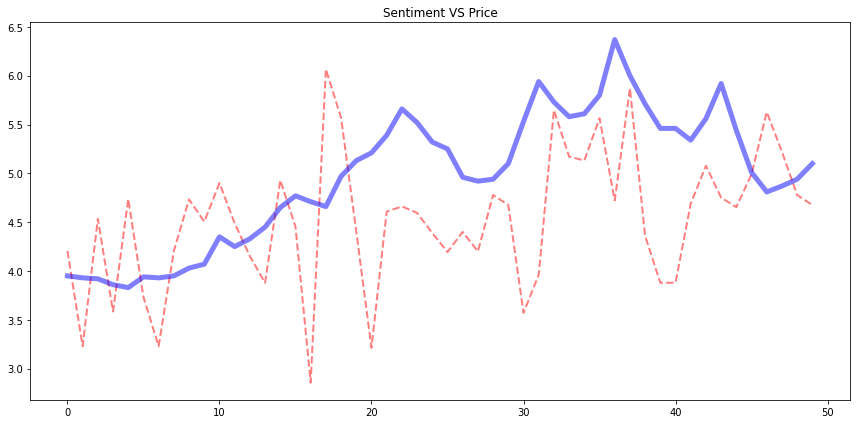

In [155]:
avg = sum(list(dataFrame.Price))/len(list(dataFrame.Price))
sen = list(dataFrame.Sentiment)
price = list(dataFrame.Price)
for i in range (len(sen)):
    sen[i] = -(sen[i]*avg)+3.2
plt.figure(figsize=(12, 6))
l1 = plt.plot(sen, lw = 2, color='red', alpha=0.5, linestyle='dashed')
l2 = plt.plot(price, lw = 5, color='blue', alpha=0.5)
plt.title('Sentiment VS Price')
plt.show()